# Линейная регрессия

Необходимо реализовать модель линейной регрессии, которая моделирует поведение функции синуса на основе исходных данных

## Подключение библиотек

In [431]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Работа с данными

In [432]:
x_original = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y_original = np.sin(x_original)

x_original = x_original.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(
    x_original, y_original, 
    test_size=0.3, 
    random_state=42
)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Визуализация данных

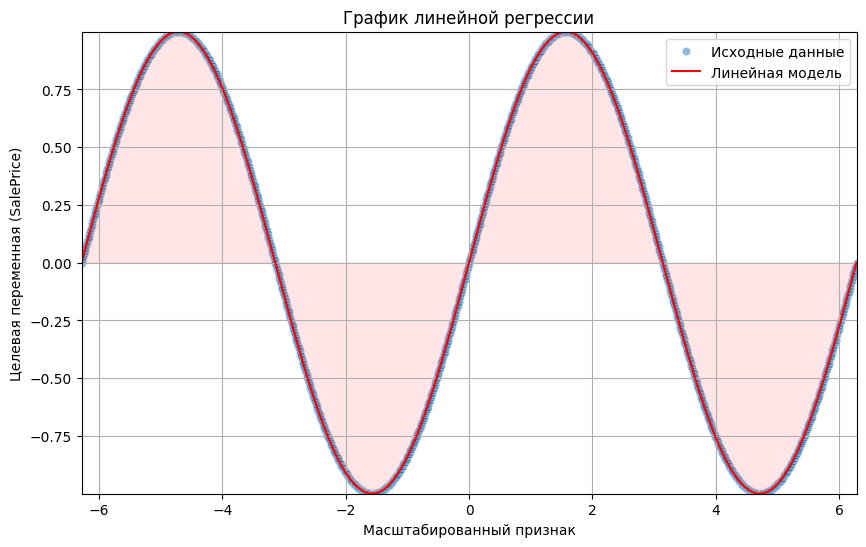

In [433]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=x_original.ravel(), y=y_original.ravel(), alpha=0.5, label="Исходные данные")

x_range = np.linspace(min(x_original), max(x_original), 500).reshape(-1, 1) 
y_range = np.sin(x_range)

plt.plot(x_range.ravel(), y_range.ravel(), color='red', label="Линейная модель")
plt.fill_between(x_range.ravel(), y_range.ravel(), color='red', alpha=0.1)

plt.title("График линейной регрессии")
plt.xlabel("Масштабированный признак")
plt.ylabel("Целевая переменная (SalePrice)")
plt.legend()
plt.grid(True)

plt.xlim(min(x_original), max(x_original))
plt.ylim(min(y_original), max(y_original))
plt.show()

## 2. Модель 

### Создаем модель

In [434]:
class LinearRegression:
  def __init__(self, lr=0.001, eps=1e-8, iterations=1000, degree=1):
    self.lr = lr
    self.iterations = iterations
    self.eps = eps
    self.degree = degree
    self.weights = None    
    self.mseHistory = []
    
  def addIntercept(self, X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)
    
  def addPolynomialFeatures(self, X):
    if self.degree <= 1:
      return X  
    poly_features = [X ** i for i in range(1, self.degree + 1)]
    return np.hstack(poly_features)
  
  
  def train(self, X, Y):
    self.mseHistory.clear()
    X = self.addPolynomialFeatures(X)
    X = self.addIntercept(X)
    self.weights = np.zeros(X.shape[1])
    i = 0
    while True:
      y_pred = X @ self.weights
      error = y_pred - Y
      grad = (2 / X.shape[0]) * X.T @ error
      self.weights -= self.lr * grad
      mse = np.mean(error ** 2)
      self.mseHistory.append(mse)
      if i > 0 and abs(self.mseHistory[i] - self.mseHistory[i-1]) < self.eps:
        print(f"Остановка на итерации {i} из-за маленького изменения MSE.")
        break
      i+=1
        
  def predict(self, X):
    X = self.addPolynomialFeatures(X)
    X = self.addIntercept(X)
    return X @ self.weights
  
  def getWeights(self):
    return self.weights 
    
  def getHistory(self):
    return self.mseHistory

### Тренируем

Остановка на итерации 495963 из-за маленького изменения MSE.


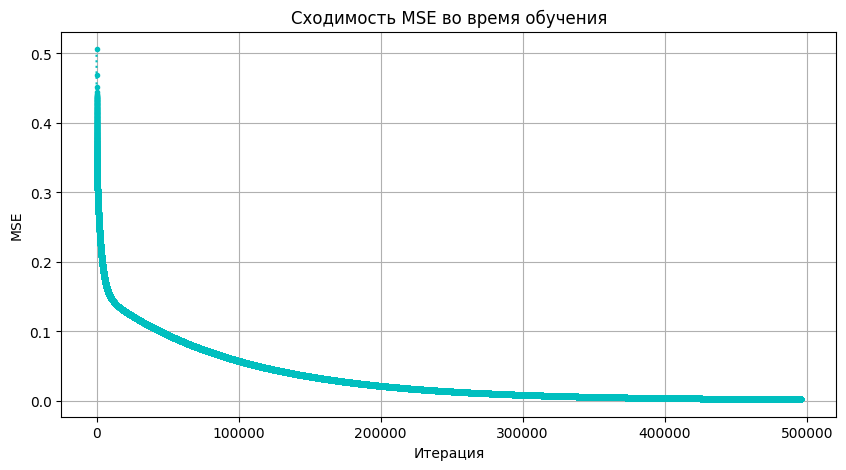

In [435]:
model = LinearRegression(degree=8)
model.train(x_train, y_train)

mseHistory = model.getHistory()
plt.figure(figsize=(10, 5))
plt.plot(mseHistory, marker='.', linestyle=':', color='c')
plt.title('Сходимость MSE во время обучения')
plt.xlabel('Итерация')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

### Оценка качества модели на тренировочных данных

#### Функционал качества

In [436]:
y_pred = model.predict(x_train)
mse = np.mean((y_pred - y_train) ** 2)
print(f"MSE: {mse:.5f}")

MSE: 0.00247


#### Визуализация модели

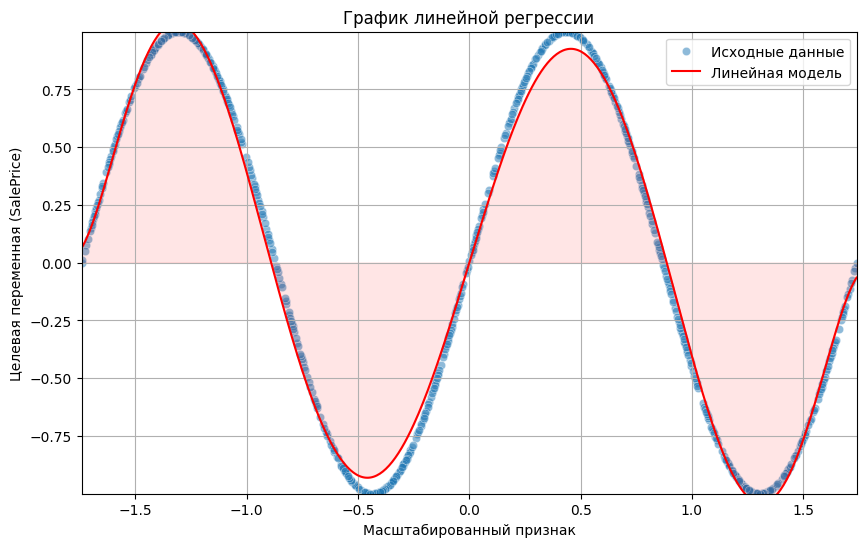

In [437]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=x_train.ravel(), y=y_train.ravel(), alpha=0.5, label="Исходные данные")

x_range = np.linspace(min(x_train), max(x_train), 500).reshape(-1, 1) 
y_range = model.predict(x_range)
plt.plot(x_range.ravel(), y_range, color='red', label="Линейная модель")
plt.fill_between(x_range.ravel(), y_range, color='red', alpha=0.1)

plt.title("График линейной регрессии")
plt.xlabel("Масштабированный признак")
plt.ylabel("Целевая переменная (SalePrice)")
plt.legend()
plt.grid(True)

plt.xlim(min(x_train), max(x_train))
plt.ylim(min(y_train), max(y_train))
plt.show()

### Оценка качества модели на тестовых данных

#### Функционал качества

In [438]:
y_pred = model.predict(x_test)
mse = np.mean((y_pred - y_test) ** 2)
print(f"MSE: {mse:.5f}")

MSE: 0.00224


#### Визуализация модели

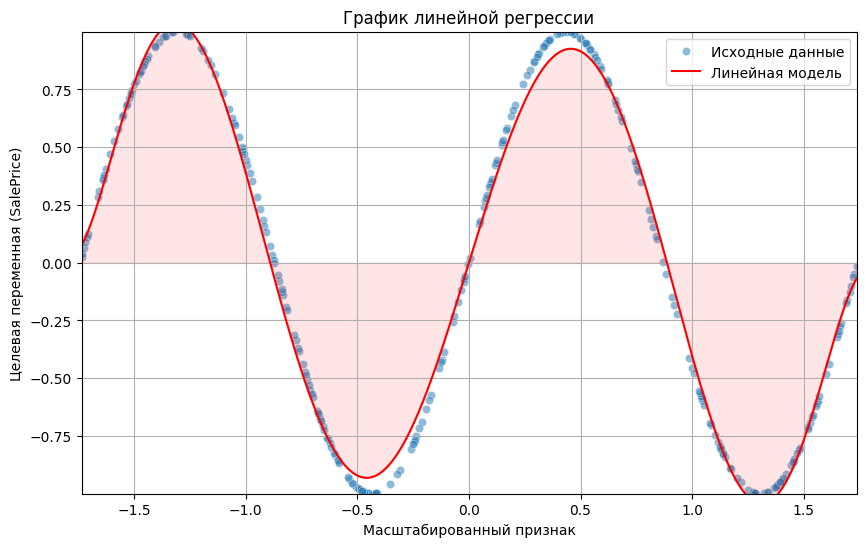

In [439]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=x_test.ravel(), y=y_test.ravel(), alpha=0.5, label="Исходные данные")

x_range = np.linspace(min(x_test), max(x_test), 500).reshape(-1, 1) 
y_range = model.predict(x_range)
plt.plot(x_range.ravel(), y_range, color='red', label="Линейная модель")
plt.fill_between(x_range.ravel(), y_range, color='red', alpha=0.1)

plt.title("График линейной регрессии")
plt.xlabel("Масштабированный признак")
plt.ylabel("Целевая переменная (SalePrice)")
plt.legend()
plt.grid(True)

plt.xlim(min(x_test), max(x_test))
plt.ylim(min(y_test), max(y_test))
plt.show()